In [1]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta
import numpy as np

In [2]:
hs300 = ts.get_k_data( 'hs300',start= '2016-01-01',ktype = 'D')
hs300 = hs300.set_index('date')#把date把成索引

In [3]:
closed = hs300['close'].values#提取收盘价
hs300['short'] = ta.SMA(closed,10)#计算10日均线
hs300['long'] = ta.SMA(closed,40)#计算40日均线
hs300['s-l'] = hs300['short']-hs300['long']#计算10日均线和40日均线的差值


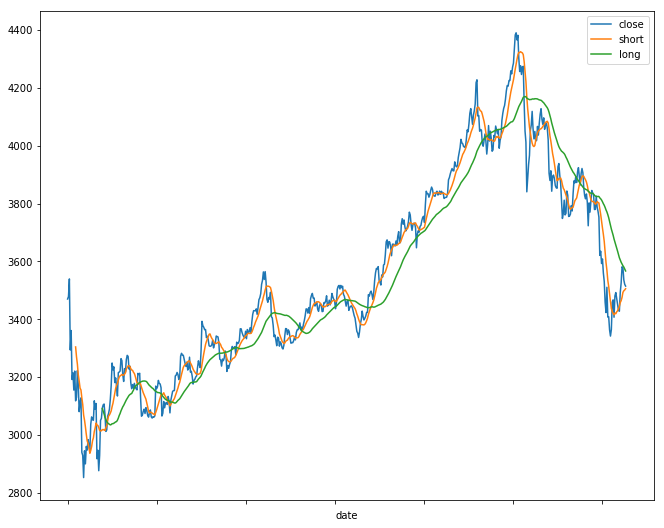

In [4]:
hs300[["close","short","long"]].plot(figsize=(11,9))
plt.show()

In [5]:
hs300['signal'] = np.where(hs300['s-l']>3,1,0)
#把大于3点的给1,则是零

In [6]:
hs300['signal'] = np.where(hs300['s-l']<3,-1,hs300['signal'])
#把小于3的改成-1,其它的不变

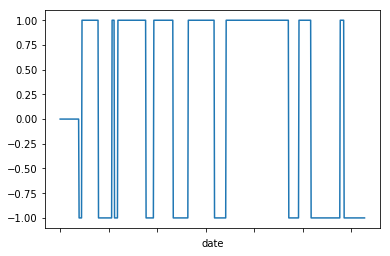

 1    353
-1    236
 0     39
Name: signal, dtype: int64

In [7]:
hs300['signal'].plot(lw =1.5)
plt.show()
hs300['signal'].value_counts()#统计
